<a href="https://colab.research.google.com/github/a-apte/DS-Unit-2-Sprint-4-Model-Validation/blob/master/DS_Unit_2_Sprint_Challenge_4_Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Data Science Unit 2 Sprint Challenge 4 — Model Validation

Follow the instructions for each numbered part to earn a score of 2. See the bottom of the notebook for a list of ways you can earn a score of 3.

## Predicting Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive.

The goal is to predict the last column, whether the donor made a donation in March 2007, using information about each donor's history. We'll measure success using recall score as the model evaluation metric.

Good data-driven systems for tracking and predicting donations and supply needs can improve the entire supply chain, making sure that more patients get the blood transfusions they need.

#### Run this cell to load the data:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-whitegrid')


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

df = df.rename(columns={
    'Recency (months)': 'months_since_last_donation', 
    'Frequency (times)': 'number_of_donations', 
    'Monetary (c.c. blood)': 'total_volume_donated', 
    'Time (months)': 'months_since_first_donation', 
    'whether he/she donated blood in March 2007': 'made_donation_in_march_2007'
})

print (df.shape)

df.head()

(748, 5)


,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [2]:
df.dtypes

months_since_last_donation     int64
number_of_donations            int64
total_volume_donated           int64
months_since_first_donation    int64
made_donation_in_march_2007    int64
dtype: object

In [3]:
df.isnull().sum()

months_since_last_donation     0
number_of_donations            0
total_volume_donated           0
months_since_first_donation    0
made_donation_in_march_2007    0
dtype: int64

In [4]:
df.corr()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
months_since_last_donation,1.000000,-0.182745,-0.182745,0.160618,-0.279869
number_of_donations,-0.182745,1.000000,1.000000,0.634940,0.218633
total_volume_donated,-0.182745,1.000000,1.000000,0.634940,0.218633
months_since_first_donation,0.160618,0.634940,0.634940,1.000000,-0.035854
made_donation_in_march_2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


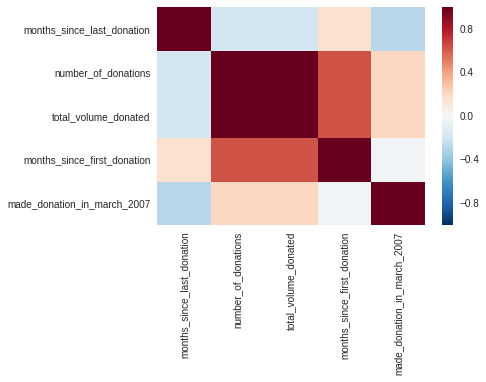

In [5]:
import seaborn as sns

sns.heatmap(df.corr())

In [6]:
y = df['made_donation_in_march_2007']

X = df.drop('made_donation_in_march_2007',axis='columns')

X.shape, y.shape

((748, 4), (748,))

## Part 1.1 — Begin with baselines

What **accuracy score** would you get here with a **"majority class baseline"?** 
 
(You don't need to split the data into train and test sets yet. You can answer this question either with a scikit-learn function or with a pandas function.)

**The majority class baseline is the mode of the outcome**

In [7]:
y.value_counts(normalize=True)

0    0.762032
1    0.237968
Name: made_donation_in_march_2007, dtype: float64

In [8]:
majority_class = y.mode()[0]

print(majority_class)

y_pred = np.full(shape=y.shape, fill_value = majority_class)

0


In [9]:
from sklearn.metrics import accuracy_score

print(f'The accuracy of the MCB is {accuracy_score(y, y_pred)}')

The accuracy of the MCB is 0.7620320855614974


What **recall score** would you get here with a **majority class baseline?**

(You can answer this question either with a scikit-learn function or with no code, just your understanding of recall.)

**Recall = true positive / (true positive  + false negative) but with a majority class baseline, the predicted positive is zero because the mode is negative.**

In [10]:
pd.crosstab(y,y_pred)

col_0,0
made_donation_in_march_2007,
0,570
1,178


In [11]:
# Recall = TP / TP + FN, 

TP = 0 
FN = 178

recall = TP/(TP + FN)

print(f'The recall score is {recall}')

The recall score is 0.0


In [12]:
from sklearn.metrics import recall_score

recall_score(y,y_pred)

0.0

## Part 1.2 — Split data

In this Sprint Challenge, you will use "Cross-Validation with Independent Test Set" for your model evaluation protocol.

First, **split the data into `X_train, X_test, y_train, y_test`**, with random shuffle. (You can include 75% of the data in the train set, and hold out 25% for the test set.)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True, random_state=237)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((561, 4), (187, 4), (561,), (187,))

## Part 2.1 — Make a pipeline

Make a **pipeline** which includes:
- Preprocessing with any scikit-learn [**Scaler**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- Feature selection with **[`SelectKBest`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)([`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html))**
- Classification with [**`LogisticRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [0]:
from sklearn.feature_selection import f_regression, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



pipe = make_pipeline(
    StandardScaler(), 
    SelectKBest(f_classif), 
    LogisticRegression(solver = 'lbfgs')
)



## Part 2.2 — Do Grid Search Cross-Validation

Do [**GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with your pipeline. Use **5 folds** and **recall score**.

Include these **parameters for your grid:**

#### `SelectKBest`
- `k : 1, 2, 3, 4`

#### `LogisticRegression`
- `class_weight : None, 'balanced'`
- `C : .0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0`


**Fit** on the appropriate data.

In [15]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid = {
    'selectkbest__k': range(1, len(X_train.columns)), 
    'logisticregression__class_weight': [None, 'balanced'],
    'logisticregression__C': [.0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0]
}


gs = GridSearchCV(pipe, param_grid=param_grid, cv=5, 
                  scoring='recall', return_train_score=True,verbose=10) 


gs.fit(X_train, y_train)





Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-pa

[CV] logisticregression__C=0.0001, logisticregression__class_weight=balanced, selectkbest__k=1 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=balanced, selectkbest__k=1, score=0.7307692307692307, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=balanced, selectkbest__k=1 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=balanced, selectkbest__k=1, score=0.7692307692307693, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=balanced, selectkbest__k=1 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=balanced, selectkbest__k=1, score=0.8846153846153846, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=balanced, selectkbest__k=2 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=balanced, selectkbest__k=2, score=0.6153846153846154, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.parti

[CV]  logisticregression__C=0.001, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=0.001, logisticregression__class_weight=None, selectkbest__k=2 
[CV]  logisticregression__C=0.001, logisticregression__class_weight=None, selectkbest__k=2, score=0.0, total=   0.0s
[CV] logisticregression__C=0.001, logisticregression__class_weight=None, selectkbest__k=2 
[CV]  logisticregression__C=0.001, logisticregression__class_weight=None, selectkbest__k=2, score=0.0, total=   0.0s
[CV] logisticregression__C=0.001, logisticregression__class_weight=None, selectkbest__k=2 
[CV]  logisticregression__C=0.001, logisticregression__class_weight=None, selectkbest__k=2, score=0.0, total=   0.0s
[CV] logisticregression__C=0.001, logisticregression__class_weight=None, selectkbest__k=2 
[CV]  logisticregression__C=0.001, logisticregression__class_weight=None, selectkbest__k=2, score=0.0, total=   0.0s
[CV] logisticregression__C=0.001, logisticregressio

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_par

[CV]  logisticregression__C=0.001, logisticregression__class_weight=balanced, selectkbest__k=2, score=0.7307692307692307, total=   0.0s
[CV] logisticregression__C=0.001, logisticregression__class_weight=balanced, selectkbest__k=2 
[CV]  logisticregression__C=0.001, logisticregression__class_weight=balanced, selectkbest__k=2, score=0.7307692307692307, total=   0.0s
[CV] logisticregression__C=0.001, logisticregression__class_weight=balanced, selectkbest__k=2 
[CV]  logisticregression__C=0.001, logisticregression__class_weight=balanced, selectkbest__k=2, score=0.6923076923076923, total=   0.0s
[CV] logisticregression__C=0.001, logisticregression__class_weight=balanced, selectkbest__k=3 
[CV]  logisticregression__C=0.001, logisticregression__class_weight=balanced, selectkbest__k=3, score=0.5, total=   0.0s
[CV] logisticregression__C=0.001, logisticregression__class_weight=balanced, selectkbest__k=3 
[CV]  logisticregression__C=0.001, logisticregression__class_weight=balanced, selectkbest__

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt

[CV]  logisticregression__C=0.01, logisticregression__class_weight=None, selectkbest__k=3, score=0.0, total=   0.0s
[CV] logisticregression__C=0.01, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=0.01, logisticregression__class_weight=None, selectkbest__k=3, score=0.0, total=   0.0s
[CV] logisticregression__C=0.01, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=0.01, logisticregression__class_weight=None, selectkbest__k=3, score=0.07692307692307693, total=   0.0s
[CV] logisticregression__C=0.01, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=0.01, logisticregression__class_weight=None, selectkbest__k=3, score=0.07692307692307693, total=   0.0s
[CV] logisticregression__C=0.01, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=0.01, logisticregression__class_weight=None, selectkbest__k=3, score=0.0, total=   0.0s
[CV] logisticregression__C=0

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt

[CV]  logisticregression__C=0.01, logisticregression__class_weight=balanced, selectkbest__k=3, score=0.6923076923076923, total=   0.0s
[CV] logisticregression__C=0.1, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.1, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=0.1, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.1, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=0.1, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.1, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=0.1, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.1, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=0.1, logisticregressio

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt

[CV] logisticregression__C=0.1, logisticregression__class_weight=balanced, selectkbest__k=1 
[CV]  logisticregression__C=0.1, logisticregression__class_weight=balanced, selectkbest__k=1, score=0.7692307692307693, total=   0.0s
[CV] logisticregression__C=0.1, logisticregression__class_weight=balanced, selectkbest__k=1 
[CV]  logisticregression__C=0.1, logisticregression__class_weight=balanced, selectkbest__k=1, score=0.8846153846153846, total=   0.0s
[CV] logisticregression__C=0.1, logisticregression__class_weight=balanced, selectkbest__k=2 
[CV]  logisticregression__C=0.1, logisticregression__class_weight=balanced, selectkbest__k=2, score=0.6923076923076923, total=   0.0s
[CV] logisticregression__C=0.1, logisticregression__class_weight=balanced, selectkbest__k=2 
[CV]  logisticregression__C=0.1, logisticregression__class_weight=balanced, selectkbest__k=2, score=0.8461538461538461, total=   0.0s
[CV] logisticregression__C=0.1, logisticregression__class_weight=balanced, selectkbest__k=2 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_par

[CV]  logisticregression__C=1.0, logisticregression__class_weight=None, selectkbest__k=2, score=0.07692307692307693, total=   0.0s
[CV] logisticregression__C=1.0, logisticregression__class_weight=None, selectkbest__k=2 
[CV]  logisticregression__C=1.0, logisticregression__class_weight=None, selectkbest__k=2, score=0.19230769230769232, total=   0.0s
[CV] logisticregression__C=1.0, logisticregression__class_weight=None, selectkbest__k=2 
[CV]  logisticregression__C=1.0, logisticregression__class_weight=None, selectkbest__k=2, score=0.15384615384615385, total=   0.0s
[CV] logisticregression__C=1.0, logisticregression__class_weight=None, selectkbest__k=2 
[CV]  logisticregression__C=1.0, logisticregression__class_weight=None, selectkbest__k=2, score=0.0, total=   0.0s
[CV] logisticregression__C=1.0, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=1.0, logisticregression__class_weight=None, selectkbest__k=3, score=0.07692307692307693, total=   0.0s
[CV] 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_par

[CV]  logisticregression__C=1.0, logisticregression__class_weight=balanced, selectkbest__k=2, score=0.8461538461538461, total=   0.0s
[CV] logisticregression__C=1.0, logisticregression__class_weight=balanced, selectkbest__k=3 
[CV]  logisticregression__C=1.0, logisticregression__class_weight=balanced, selectkbest__k=3, score=0.6923076923076923, total=   0.0s
[CV] logisticregression__C=1.0, logisticregression__class_weight=balanced, selectkbest__k=3 
[CV]  logisticregression__C=1.0, logisticregression__class_weight=balanced, selectkbest__k=3, score=0.8461538461538461, total=   0.0s
[CV] logisticregression__C=1.0, logisticregression__class_weight=balanced, selectkbest__k=3 
[CV]  logisticregression__C=1.0, logisticregression__class_weight=balanced, selectkbest__k=3, score=0.7692307692307693, total=   0.0s
[CV] logisticregression__C=1.0, logisticregression__class_weight=balanced, selectkbest__k=3 
[CV]  logisticregression__C=1.0, logisticregression__class_weight=balanced, selectkbest__k=3

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt

[CV] logisticregression__C=10.0, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=10.0, logisticregression__class_weight=None, selectkbest__k=3, score=0.15384615384615385, total=   0.0s
[CV] logisticregression__C=10.0, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=10.0, logisticregression__class_weight=None, selectkbest__k=3, score=0.0, total=   0.0s
[CV] logisticregression__C=10.0, logisticregression__class_weight=balanced, selectkbest__k=1 
[CV]  logisticregression__C=10.0, logisticregression__class_weight=balanced, selectkbest__k=1, score=0.6923076923076923, total=   0.0s
[CV] logisticregression__C=10.0, logisticregression__class_weight=balanced, selectkbest__k=1 
[CV]  logisticregression__C=10.0, logisticregression__class_weight=balanced, selectkbest__k=1, score=0.7307692307692307, total=   0.0s
[CV] logisticregression__C=10.0, logisticregression__class_weight=balanced, selectkbest__k=1 
[CV]  logisticregres

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_par

[CV] logisticregression__C=100.0, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=100.0, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=100.0, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=100.0, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=100.0, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=100.0, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=100.0, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=100.0, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=100.0, logisticregression__class_weight=None, selectkbest__k=2 
[CV]  logisticregression__C=100.0, logisticregression__class_weight=None, sel

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.parti

[CV]  logisticregression__C=100.0, logisticregression__class_weight=balanced, selectkbest__k=1, score=0.7692307692307693, total=   0.0s
[CV] logisticregression__C=100.0, logisticregression__class_weight=balanced, selectkbest__k=1 
[CV]  logisticregression__C=100.0, logisticregression__class_weight=balanced, selectkbest__k=1, score=0.8846153846153846, total=   0.0s
[CV] logisticregression__C=100.0, logisticregression__class_weight=balanced, selectkbest__k=2 
[CV]  logisticregression__C=100.0, logisticregression__class_weight=balanced, selectkbest__k=2, score=0.6923076923076923, total=   0.0s
[CV] logisticregression__C=100.0, logisticregression__class_weight=balanced, selectkbest__k=2 
[CV]  logisticregression__C=100.0, logisticregression__class_weight=balanced, selectkbest__k=2, score=0.8461538461538461, total=   0.0s
[CV] logisticregression__C=100.0, logisticregression__class_weight=balanced, selectkbest__k=2 
[CV]  logisticregression__C=100.0, logisticregression__class_weight=balanced

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt

[CV]  logisticregression__C=1000.0, logisticregression__class_weight=None, selectkbest__k=2, score=0.15384615384615385, total=   0.0s
[CV] logisticregression__C=1000.0, logisticregression__class_weight=None, selectkbest__k=2 
[CV]  logisticregression__C=1000.0, logisticregression__class_weight=None, selectkbest__k=2, score=0.0, total=   0.0s
[CV] logisticregression__C=1000.0, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=1000.0, logisticregression__class_weight=None, selectkbest__k=3, score=0.07692307692307693, total=   0.0s
[CV] logisticregression__C=1000.0, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=1000.0, logisticregression__class_weight=None, selectkbest__k=3, score=0.07692307692307693, total=   0.0s
[CV] logisticregression__C=1000.0, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=1000.0, logisticregression__class_weight=None, selectkbest__k=3, score=0.19230769230

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt

[CV]  logisticregression__C=1000.0, logisticregression__class_weight=balanced, selectkbest__k=3, score=0.7692307692307693, total=   0.0s
[CV] logisticregression__C=1000.0, logisticregression__class_weight=balanced, selectkbest__k=3 
[CV]  logisticregression__C=1000.0, logisticregression__class_weight=balanced, selectkbest__k=3, score=0.8076923076923077, total=   0.0s
[CV] logisticregression__C=1000.0, logisticregression__class_weight=balanced, selectkbest__k=3 
[CV]  logisticregression__C=1000.0, logisticregression__class_weight=balanced, selectkbest__k=3, score=0.8461538461538461, total=   0.0s
[CV] logisticregression__C=10000.0, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=10000.0, logisticregression__class_weight=None, selectkbest__k=1, score=0.0, total=   0.0s
[CV] logisticregression__C=10000.0, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=10000.0, logisticregression__class_weight=None, selectkbest__k=1

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt

## Part 3 — Show best score and parameters

Display your **best cross-validation score**, and the **best parameters** (the values of `k, class_weight, C`) from the grid search.

(You're not evaluated here on how good your score is, or which parameters you find. You're only evaluated on being able to display the information. There are several ways you can get the information, and any way is acceptable.)

In [16]:
validation_score = gs.best_score_
print()
print('Best Cross-Validation Score:', validation_score)
# print()
# print('Best estimator:', gs.best_estimator_)
print()
print('Best parameters:', gs.best_params_)
print()



Best Cross-Validation Score: 0.7921294391882627

Best parameters: {'logisticregression__C': 1.0, 'logisticregression__class_weight': 'balanced', 'selectkbest__k': 2}



**The recall score from the majority class baseline was 0.0. The model with tuned parameters has a recall score of 0.79213.**

## Part 4 — Calculate classification metrics from a confusion matrix

Suppose this is the confusion matrix for your binary classification model:

<table>
  <tr>
    <th colspan="2" rowspan="2"></th>
    <th colspan="2">Predicted</th>
  </tr>
  <tr>
    <th>Negative</th>
    <th>Positive</th>
  </tr>
  <tr>
    <th rowspan="2">Actual</th>
    <th>Negative</th>
    <td>85</td>
    <td>58</td>
  </tr>
  <tr>
    <th>Positive</th>
    <td>8</td>
    <td>36</td>
  </tr>
</table>

True Negative (TN) = 85

True Positive (TP) = 36

False Negative (FN) = 8

False Positive (FP) = 58

In [0]:
TN = 85
TP = 36
FN = 8
FP = 58

Calculate accuracy

In [18]:
# Accuracy = (TN + TP) / (TN + TP + FN + FP) 

accuracy = (TN + TP) / (TN + TP + FP + FN)

print (accuracy)

0.6470588235294118


Calculate precision

In [19]:
# Precision = TP / (TP + FP) aka true positive divided by predicted yes

precision = TP / (TP + FP)

print(precision)

0.3829787234042553


Calculate recall

In [20]:
# Recall = TP / (TP + FN) aka true positive divided by actual yes aka sensitivity

recall = TP / (TP + FN)

print(recall)

0.8181818181818182


## BONUS — How you can earn a score of 3

### Part 1
Do feature engineering, to try improving your cross-validation score.

### Part 2
Add transformations in your pipeline and parameters in your grid, to try improving your cross-validation score.

### Part 3
Show names of selected features. Then do a final evaluation on the test set — what is the test score?

### Part 4
Calculate F1 score and False Positive Rate. 

#### Part 1

In [21]:
from sklearn.preprocessing import PolynomialFeatures


for degree in [0, 1, 2, 3]:
    features = PolynomialFeatures(degree).fit(X_train).get_feature_names(X_train.columns)
    print(f'{degree} degree polynomial has {len(features)} features')
    print(features)
    print('\n')

0 degree polynomial has 1 features
['1']


1 degree polynomial has 5 features
['1', 'months_since_last_donation', 'number_of_donations', 'total_volume_donated', 'months_since_first_donation']


2 degree polynomial has 15 features
['1', 'months_since_last_donation', 'number_of_donations', 'total_volume_donated', 'months_since_first_donation', 'months_since_last_donation^2', 'months_since_last_donation number_of_donations', 'months_since_last_donation total_volume_donated', 'months_since_last_donation months_since_first_donation', 'number_of_donations^2', 'number_of_donations total_volume_donated', 'number_of_donations months_since_first_donation', 'total_volume_donated^2', 'total_volume_donated months_since_first_donation', 'months_since_first_donation^2']


3 degree polynomial has 35 features
['1', 'months_since_last_donation', 'number_of_donations', 'total_volume_donated', 'months_since_first_donation', 'months_since_last_donation^2', 'months_since_last_donation number_of_donations', 

In [22]:
def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(C=1.0,class_weight='balanced', solver='lbfgs' ))
  
  
param_grid = {
    'polynomialfeatures__degree': [0,1,2,3]  
}

gridsearch_fe = GridSearchCV(PolynomialRegression(), param_grid=param_grid,
                         scoring = 'recall', cv=5,
                         return_train_score=True,verbose=10)

gridsearch_fe.fit(X_train,y_train)  

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] polynomialfeatures__degree=0 ....................................
[CV] .......... polynomialfeatures__degree=0, score=0.0, total=   0.0s
[CV] polynomialfeatures__degree=0 ....................................
[CV] .......... polynomialfeatures__degree=0, score=0.0, total=   0.0s
[CV] polynomialfeatures__degree=0 ....................................
[CV] .......... polynomialfeatures__degree=0, score=0.0, total=   0.0s
[CV] polynomialfeatures__degree=0 ....................................
[CV] .......... polynomialfeatures__degree=0, score=0.0, total=   0.0s
[CV] polynomialfeatures__degree=0 ....................................
[CV] .......... polynomialfeatures__degree=0, score=0.0, total=   0.0s
[CV] polynomialfeatures__degree=1 ....................................
[CV]  polynomialfeatures__degree=1, score=0.6538461538461539, total=   0.0s
[CV] polynomialfeatures__degree=1 ....................................
[CV]  polyno

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  polynomialfeatures__degree=2, score=0.7692307692307693, total=   0.0s
[CV] polynomialfeatures__degree=2 ....................................
[CV]  polynomialfeatures__degree=2, score=0.8461538461538461, total=   0.0s
[CV] polynomialfeatures__degree=3 ....................................
[CV]  polynomialfeatures__degree=3, score=0.46153846153846156, total=   0.0s
[CV] polynomialfeatures__degree=3 ....................................
[CV]  polynomialfeatures__degree=3, score=0.15384615384615385, total=   0.0s
[CV] polynomialfeatures__degree=3 ....................................
[CV]  polynomialfeatures__degree=3, score=0.8461538461538461, total=   0.0s
[CV] polynomialfeatures__degree=3 ....................................
[CV]  polynomialfeatures__degree=3, score=0.7692307692307693, total=   0.0s
[CV] polynomialfeatures__degree=3 ....................................
[CV]  polynomialfeatures__degree=3, score=0.8461538461538461, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'polynomialfeatures__degree': [0, 1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=10)

In [23]:
validation_score = gridsearch_fe.best_score_
print()
print('Best Cross-Validation Score:', validation_score)
# print()
# print('Best estimator:', gs.best_estimator_)
print()
print('Best parameters:', gridsearch_fe.best_params_)
print()


Best Cross-Validation Score: 0.784519402166461

Best parameters: {'polynomialfeatures__degree': 2}



#### Part 2

In [24]:
%%time

from sklearn.feature_selection import RFECV

poly = PolynomialFeatures(degree=2)
X_train_polynomial = poly.fit_transform(X_train)

print(X_train.shape, X_train_polynomial.shape)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_polynomial)

rfe = RFECV(LogisticRegression(C=1.0,class_weight='balanced', solver='lbfgs' ), 
            scoring='recall', 
            step=1, cv=5, verbose=1)

X_train_subset = rfe.fit_transform(X_train_scaled, y_train)

(561, 4) (561, 15)
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2

In [25]:
param_grid = {
    'class_weight': [None, 'balanced'],
    'C': [.0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0]
}

# Fit on the train set, with grid search cross-validation
gs2 = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv=5, 
                  scoring='recall', 
                  verbose=1)

gs2.fit(X_train_subset, y_train)




Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': [None, 'balanced'], 'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [26]:
validation_score = gs2.best_score_
print()
print('Cross-Validation Score:', validation_score)
print()
print('Best estimator:', gs2.best_estimator_)
print()


Cross-Validation Score: 0.7844508432743728

Best estimator: LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)



#### Part 3

In [27]:
all_names = poly.get_feature_names(X_train.columns)
selected_mask = rfe.support_
selected_names = [name for name, selected in zip(all_names, selected_mask) if selected]
# unselected_names = all_names[~selected_mask]

print(f'{rfe.n_features_} Features selected:')
for name in selected_names:
  print(name )
  
# for name in unselected_names:
#   print(name) 
    
    
# all_names = poly.get_feature_names(X_train.columns)
# selected_mask = rfe.support_
# selected_names = all_names[selected_mask]
# unselected_names = all_names[~selected_mask]

# print('Features selected:')
# for name in selected_names:
#   print(name)

# print()
# print('Features not selected:')
# for name in unselected_names:
#   print(name)    
    

7 Features selected:
months_since_last_donation
number_of_donations
total_volume_donated
months_since_first_donation
months_since_last_donation total_volume_donated
number_of_donations^2
total_volume_donated^2


In [30]:
from sklearn.metrics import recall_score

# Predict with X_test features
y_pred = gs.predict(X_test)

# Compare predictions to y_test labels
test_score = recall_score(y_test, y_pred)
print('Test Score:', test_score)

Test Score: 0.8125


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


#### Part 4

In [31]:
pd.crosstab(y_test,y_pred)

col_0,0,1
made_donation_in_march_2007,,
0,77,62
1,9,39


In [32]:
TP = 39
TN = 77
FN = 9
FP = 62

precision = TP / (TP+FP)
recall = TP/(TP + FN)

precision, recall
 

(0.38613861386138615, 0.8125)

In [33]:
f1_score = (2*precision*recall)/(precision+recall)
print(f'The F1 score is {f1_score}')

The F1 score is 0.5234899328859061


In [34]:
# False positive Rate = FP / all actual negative = FP / (FP + TN)

fpn = FP/(FP+TN)

print (f'The false positive rate is {fpn}')

The false positive rate is 0.4460431654676259
